In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from minority_report.clean_data import CleanData
from minority_report.scaling import Scaling
from datetime import datetime

# Load data

In [3]:
df = Scaling()
df.load_data()

,complaint_id,precinct_number,offense_type,crime_completed,offense_level,premise_desc,premise,jurisdiction,park_name,suspect_age,...,suspect_sex,latitude,longitude,metro,victim_age,victim_race,victim_sex,period,borough,patrol_borough
0,325341655,73,OFFENSES AGAINST PUBLIC ADMINI,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,NOT PARK,25-44,...,M,40.664239,-73.908425,NOT SUBWAY,<18,BLACK,M,2015-02-11 15:00:00,BROOKLYN,PATROL BORO BKLYN NORTH
1,393816841,69,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,...,UNKNOWN,40.644590,-73.892672,NOT SUBWAY,45-64,BLACK,F,2012-03-17 10:30:00,BROOKLYN,PATROL BORO BKLYN SOUTH
2,802896158,71,HARRASSMENT 2,COMPLETED,VIOLATION,INSIDE,PUBLIC SCHOOL,N.Y. POLICE DEPT,NOT PARK,<18,...,M,40.658758,-73.942435,NOT SUBWAY,18-24,BLACK,M,2016-10-27 13:48:00,BROOKLYN,PATROL BORO BKLYN SOUTH
3,633812343,112,RAPE,COMPLETED,FELONY,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,25-44,...,M,40.722364,-73.851474,NOT SUBWAY,25-44,WHITE,F,2014-11-27 19:00:00,QUEENS,PATROL BORO QUEENS NORTH
4,300349533,24,GRAND LARCENY,COMPLETED,FELONY,INSIDE,DOCTOR/DENTIST OFFICE,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,...,UNKNOWN,40.793465,-73.968950,NOT SUBWAY,45-64,WHITE,F,2013-12-11 13:30:00,MANHATTAN,PATROL BORO MAN NORTH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983202,225471008,109,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,25-44,...,M,40.785050,-73.856852,NOT SUBWAY,25-44,ASIAN / PACIFIC ISLANDER,F,2018-12-02 04:15:00,QUEENS,PATROL BORO QUEENS NORTH
6983203,368441925,25,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,25-44,...,F,40.801717,-73.937283,NOT SUBWAY,25-44,BLACK,M,2018-01-20 00:08:00,MANHATTAN,PATROL BORO MAN NORTH
6983204,146134182,41,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,FELONY,FRONT OF,STREET,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,...,UNKNOWN,40.814612,-73.903637,NOT SUBWAY,25-44,BLACK HISPANIC,F,2018-08-03 22:30:00,BRONX,PATROL BORO BRONX
6983205,763119484,107,FRAUDS,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,...,U,40.724699,-73.808549,NOT SUBWAY,18-24,ASIAN / PACIFIC ISLANDER,M,2018-12-10 11:00:00,QUEENS,PATROL BORO QUEENS SOUTH


In [4]:
df.data['new_date'] = df.data['period'].apply(lambda x: x.replace(minute = 0, second = 0))

In [ ]:
df.data

# Explore data

In [ ]:
df.data.columns

In [5]:
sample = df.data[['new_date', 'latitude', 'longitude']]

In [ ]:
sample.head()

In [6]:
inf = sample['new_date'] > datetime(2016, 10, 1, 0, 0, 0)
sup = sample['new_date'] < datetime(2016, 10, 8, 0, 0, 0)

In [7]:
sample = sample[ inf & sup ]

In [ ]:
sample

In [ ]:
sample['new_date'].value_counts()

In [8]:
liste = np.sort(np.array(sample['new_date'].value_counts().index))
liste

array(['2016-10-01T01:00:00.000000000', '2016-10-01T02:00:00.000000000',
       '2016-10-01T03:00:00.000000000', '2016-10-01T04:00:00.000000000',
       '2016-10-01T05:00:00.000000000', '2016-10-01T06:00:00.000000000',
       '2016-10-01T07:00:00.000000000', '2016-10-01T08:00:00.000000000',
       '2016-10-01T09:00:00.000000000', '2016-10-01T10:00:00.000000000',
       '2016-10-01T11:00:00.000000000', '2016-10-01T12:00:00.000000000',
       '2016-10-01T13:00:00.000000000', '2016-10-01T14:00:00.000000000',
       '2016-10-01T15:00:00.000000000', '2016-10-01T16:00:00.000000000',
       '2016-10-01T17:00:00.000000000', '2016-10-01T18:00:00.000000000',
       '2016-10-01T19:00:00.000000000', '2016-10-01T20:00:00.000000000',
       '2016-10-01T21:00:00.000000000', '2016-10-01T22:00:00.000000000',
       '2016-10-01T23:00:00.000000000', '2016-10-02T00:00:00.000000000',
       '2016-10-02T01:00:00.000000000', '2016-10-02T02:00:00.000000000',
       '2016-10-02T03:00:00.000000000', '2016-10-02

In [9]:
grouped = []
length = len(liste)
for index, timestamp in enumerate(liste):
    print(f'Grouping timestamp {index+1}/{length}')
    by_hour = np.array(sample[sample['new_date']== timestamp])
    grouped.append(by_hour) 

Grouping timestamp 1/167
Grouping timestamp 2/167
Grouping timestamp 3/167
Grouping timestamp 4/167
Grouping timestamp 5/167
Grouping timestamp 6/167
Grouping timestamp 7/167
Grouping timestamp 8/167
Grouping timestamp 9/167
Grouping timestamp 10/167
Grouping timestamp 11/167
Grouping timestamp 12/167
Grouping timestamp 13/167
Grouping timestamp 14/167
Grouping timestamp 15/167
Grouping timestamp 16/167
Grouping timestamp 17/167
Grouping timestamp 18/167
Grouping timestamp 19/167
Grouping timestamp 20/167
Grouping timestamp 21/167
Grouping timestamp 22/167
Grouping timestamp 23/167
Grouping timestamp 24/167
Grouping timestamp 25/167
Grouping timestamp 26/167
Grouping timestamp 27/167
Grouping timestamp 28/167
Grouping timestamp 29/167
Grouping timestamp 30/167
Grouping timestamp 31/167
Grouping timestamp 32/167
Grouping timestamp 33/167
Grouping timestamp 34/167
Grouping timestamp 35/167
Grouping timestamp 36/167
Grouping timestamp 37/167
Grouping timestamp 38/167
Grouping timestamp 39

In [10]:
gr_array = np.array(grouped, dtype=object)
gr_array

array([array([[Timestamp('2016-10-01 01:00:00'), 40.851657379, -73.893874555],
       [Timestamp('2016-10-01 01:00:00'), 40.712362272, -73.89122506],
       [Timestamp('2016-10-01 01:00:00'), 40.678089007, -73.826818687],
       [Timestamp('2016-10-01 01:00:00'), 40.738908511, -73.733776008],
       [Timestamp('2016-10-01 01:00:00'), 40.70443503, -73.893780714],
       [Timestamp('2016-10-01 01:00:00'), 40.68358056, -73.872458153],
       [Timestamp('2016-10-01 01:00:00'), 40.643086138,
        -74.00166980600001],
       [Timestamp('2016-10-01 01:00:00'), 40.761420989, -73.924188874],
       [Timestamp('2016-10-01 01:00:00'), 40.697271541, -73.805740449],
       [Timestamp('2016-10-01 01:00:00'), 40.756860976999995,
        -73.87565666399999],
       [Timestamp('2016-10-01 01:00:00'), 40.752634414, -73.98571944],
       [Timestamp('2016-10-01 01:00:00'), 40.846442707, -73.934927931],
       [Timestamp('2016-10-01 01:00:00'), 40.664183598, -73.959346103],
       [Timestamp('2016-10-01

In [ ]:
gr_array[0]

In [ ]:
len(gr_array[0])

In [17]:
ts = [element[0][0] for element in gr_array]
ts

[Timestamp('2016-10-01 01:00:00'),
 Timestamp('2016-10-01 02:00:00'),
 Timestamp('2016-10-01 03:00:00'),
 Timestamp('2016-10-01 04:00:00'),
 Timestamp('2016-10-01 05:00:00'),
 Timestamp('2016-10-01 06:00:00'),
 Timestamp('2016-10-01 07:00:00'),
 Timestamp('2016-10-01 08:00:00'),
 Timestamp('2016-10-01 09:00:00'),
 Timestamp('2016-10-01 10:00:00'),
 Timestamp('2016-10-01 11:00:00'),
 Timestamp('2016-10-01 12:00:00'),
 Timestamp('2016-10-01 13:00:00'),
 Timestamp('2016-10-01 14:00:00'),
 Timestamp('2016-10-01 15:00:00'),
 Timestamp('2016-10-01 16:00:00'),
 Timestamp('2016-10-01 17:00:00'),
 Timestamp('2016-10-01 18:00:00'),
 Timestamp('2016-10-01 19:00:00'),
 Timestamp('2016-10-01 20:00:00'),
 Timestamp('2016-10-01 21:00:00'),
 Timestamp('2016-10-01 22:00:00'),
 Timestamp('2016-10-01 23:00:00'),
 Timestamp('2016-10-02 00:00:00'),
 Timestamp('2016-10-02 01:00:00'),
 Timestamp('2016-10-02 02:00:00'),
 Timestamp('2016-10-02 03:00:00'),
 Timestamp('2016-10-02 04:00:00'),
 Timestamp('2016-10-

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
length = [len(element) for element in gr_array]

<ipython-input-37-0591d41c5fbe>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ts, rotation=90)


[Text(0.0, 0, '2016-10-01 01:00:00'),
 Text(20.0, 0, '2016-10-01 02:00:00'),
 Text(40.0, 0, '2016-10-01 03:00:00'),
 Text(60.0, 0, '2016-10-01 04:00:00'),
 Text(80.0, 0, '2016-10-01 05:00:00'),
 Text(100.0, 0, '2016-10-01 06:00:00'),
 Text(120.0, 0, '2016-10-01 07:00:00'),
 Text(140.0, 0, '2016-10-01 08:00:00')]

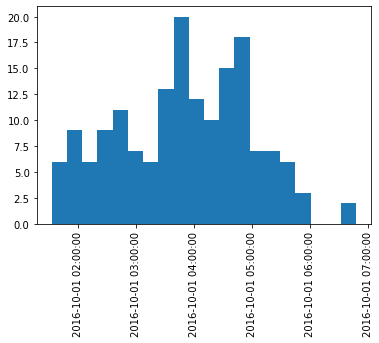

In [37]:
fig, ax = plt.subplots()

ax.hist(length, bins=20);
ax.set_xticklabels(ts, rotation=90)

#plt.show()

In [ ]:
df.data['new_date'].value_counts()